In [26]:
# https://www.youtube.com/watch?v=ADV-AjAXHdc

import cv2

In [27]:
# https://stackoverflow.com/questions/28816046/displaying-different-images-with-actual-size-in-matplotlib-subplot

import matplotlib as mpl
import matplotlib.pyplot as plt

def display(im_path):

#     dpi = 80
    dpi = mpl.rcParams['figure.dpi']   # Apparently the default dpi changed to 100, so to be safe in the future you can directly access the dpi from the rcParams
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()
    
def display_without_depth(im_path):
    dpi = 80
    dpi = mpl.rcParams['figure.dpi']   # Apparently the default dpi changed to 100, so to be safe in the future you can directly access the dpi from the rcParams
    im_data = plt.imread(im_path)
    height, width = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [28]:
# display(image_file)

# 01: Inverted Images

In [29]:
def invert_img(img):
    inverted_img = cv2.bitwise_not(img)
    cv2.imwrite('../data/temp/inverted.jpeg', inverted_img)
    display('../data/temp/inverted.jpeg')

In [30]:
# display('../data/temp/inverted.jpeg')

# 02: Rescaling

# 03: Binarization

In [31]:
# This will automatically convert our image file into grayscale
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [32]:
# Mera toh error araha hai, tera run hoga toh dekh le

# display("../data/temp/gray.jpeg")

In [33]:
def binarization(img):
    gray_image = grayscale(img)
    cv2.imwrite("../data/temp/gray.jpeg", gray_image)
    display_without_depth("../data/temp/gray.jpeg")
    
    global im_bw
    
    # Threshold
    thresh, im_bw = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    # Edit 127 & 255 as per the requirement

    var = cv2.imwrite('../data/temp/bw_image.jpeg', im_bw)
    display_without_depth('../data/temp/bw_image.jpeg')
    return (im_bw)


image_file = "../data/complex1.jpg"
# image_file = "../data/lastWednesday.jpg"
img = cv2.imread(image_file)

In [34]:
# Same, yaha bhi mera run nahi ho raha hai... Tera ho raha hai toh dekh le

# display('../data/temp/bw_image.jpeg')

# 04: Noise Removal

In [35]:
import numpy as np

def noise_removal(image):
    kernal = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernal, iterations=1)
    kernal = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernal, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernal)
    image = cv2.medianBlur(image, 1)
    return (image)

In [36]:
def remove_noise(img):
    # no_noise = noise_removal(binarization(img))
    global no_noise
    no_noise = noise_removal(im_bw)
    var = cv2.imwrite('../data/temp/no_noise.jpeg', no_noise)
    display_without_depth('../data/temp/no_noise.jpeg')
    return (no_noise)

# image_file = "../data/lastWednesday.jpg"
# img = cv2.imread(image_file)
# remove_noise(img)

In [37]:
# Yaha bhi nahi hua

# display('../data/temp/no_noise.jpeg')

# 05: Dilation and Erosion

In [38]:
def thin_font(image):
    image = cv2.bitwise_not(image)
    kernal = np.ones((2, 2), np.uint8)
    image = cv2.erode(image, kernal, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

def thick_font(image):
    image = cv2.bitwise_not(image)
    kernal = np.ones((2, 2), np.uint8)
    image = cv2.dilate(image, kernal, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [39]:
def erosion(img):
    # eroded_image = thin_font(remove_noise(img))
    eroded_image = thin_font(no_noise)
    var = cv2.imwrite('../data/temp/eroded_image.jpeg', eroded_image)
    print(var)
    display_without_depth('../data/temp/eroded_image.jpeg')
    return (eroded_image)
    
# image_file = "../data/good.jpg"
# img = cv2.imread(image_file)
# erosion(img)

In [40]:
# display_without_depth('../data/temp/eroded_image.jpeg')

In [41]:
# dilated_image = thick_font(no_noise)
# cv2.imwrite('../data/temp/dilated_image.jpg', dilated_image)

def dilation(img):
    dilated_image = thick_font(no_noise)
    var = cv2.imwrite('../data/temp/dilated_image.jpg', dilated_image)
    print(var)
    display_without_depth("../data/temp/dilated_image.jpg")
    return (dilated_image)

# image_file = "../data/good.jpg"
# img = cv2.imread(image_file)
# dilation(img)

In [42]:
# display("../data/temp/dilated_image.jpeg")

# 06: Rotation/Deskewing

In [52]:
# https://becominghuman.ai/how-to-automatically-deskew-straighten-a-text-image-using-opencv-a0c30aed83df

# Calculate skew angle of an image
def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x, y, w, h = rect
        cv2.rectangle(newImage, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print(len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("../data/temp/boxes.jpg", newImage)

    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle

# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

7
True


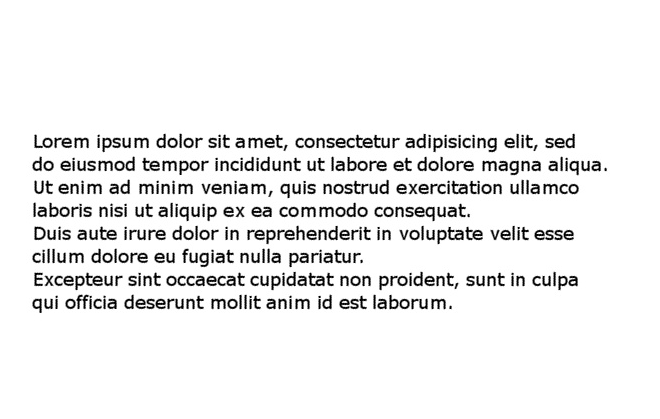

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [54]:
# fixed = deskew(new)
# cv2.imwrite('../data/temp/rotated_fixed.jpg', fixed)

def deskew_rotation(img):
    fixed = deskew(img)
    var = cv2.imwrite('../data/temp/rotated_fixed.jpg', fixed)
    print(var)
    display('../data/temp/rotated_fixed.jpg')
    return (fixed)

# image_file = "../data/skewwed.jpg"
# img = cv2.imread(image_file)
# deskew_rotation(img)

In [45]:
# display('../data/temp/rotated_fixed.jpg')

# 07: Removing Borders 

In [46]:
def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

In [47]:
def removing_borders(img):
    global no_borders
    no_borders = remove_borders(no_noise)
    var = cv2.imwrite("../data/temp/no_borders.png", no_borders)
    print(var)
    display_without_depth('../data/temp/no_borders.png')
    return (no_borders)

# image_file = "../data/lastWednesday.jpg"
# img = cv2.imread(image_file)
# removing_borders(img)

# 08: Missing Borders

In [48]:
def missing_border(img):
    color = [255, 255, 255]
    top, bottom, left, right = [150]*4
    # image_with_border = cv2.copyMakeBorder(removing_borders(img), top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    image_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    var = cv2.imwrite('../data/temp/image_with_border.jpg', image_with_border)
    display_without_depth('../data/temp/image_with_border.jpg')
    return (var)
    
    
# image_file = "../data/lastWednesday.jpg"
# img = cv2.imread(image_file)
# missing_border(img)

In [49]:
# display('../data/temp/image_with_border.jpg')

# 09: Integration


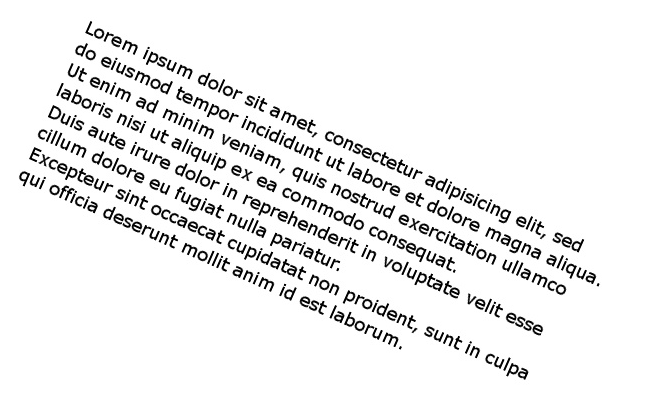

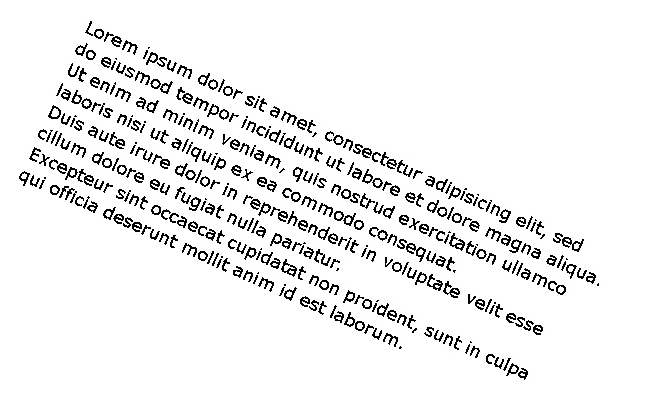

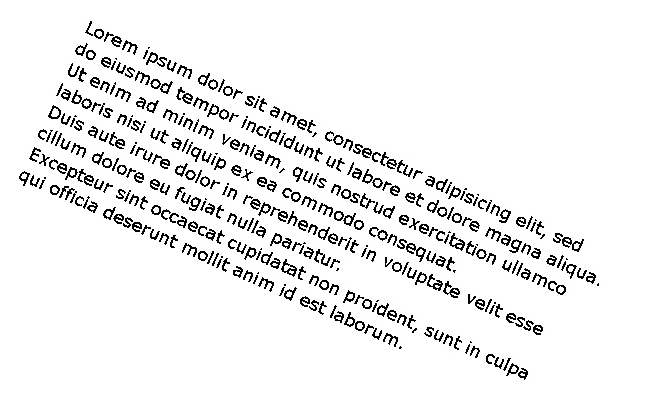

True


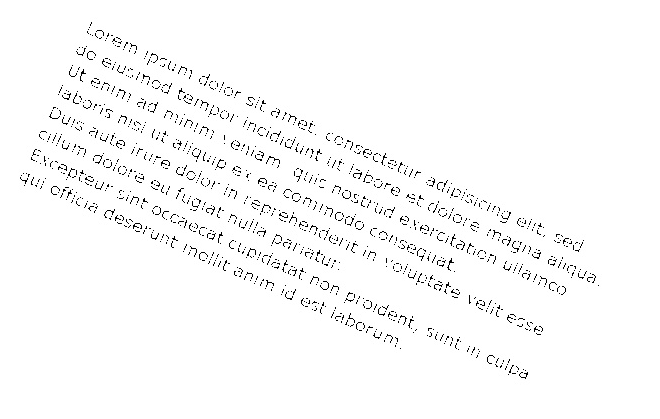

True


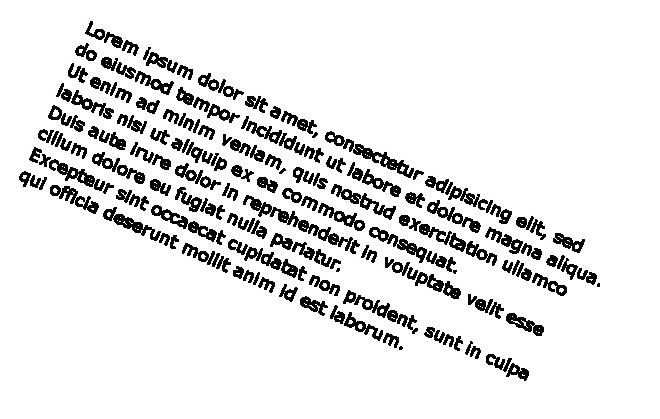

error: OpenCV(4.7.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x981fb336::Set<1,-1,-1>,struct cv::impl::A0x981fb336::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [55]:
def imageManipulation(image):
    image = binarization(image)
    image = remove_noise(image)
    image = erosion(image)
    image = dilation(image)
#     image = deskew_rotation(image)
    image = removing_borders(image)
    image = missing_border(image)
    return image
    
    
image_file = "../data/skewwed.jpg"
img = cv2.imread(image_file)
imageManipulation(img)
# display(image_file)